In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [2]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


### Preprocessing / Data cleaning

In [3]:
data.isnull().sum()


Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Stream'] = encoder.fit_transform(data['Stream'])


In [5]:
data

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,4,0,7,0,0,0
2962,23,1,5,1,7,1,0,0
2963,22,1,4,1,7,0,0,0
2964,22,1,1,1,7,0,0,0


In [6]:
data = data.drop('Age', axis = 1)
X = data.drop('PlacedOrNot', axis = 1)
y = data['PlacedOrNot']

In [7]:
y.value_counts()

PlacedOrNot
1    1639
0    1327
Name: count, dtype: int64

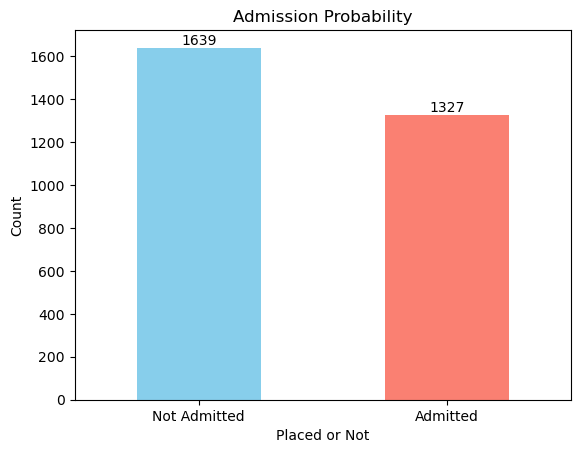

In [8]:
import matplotlib.pyplot as plt

# Calculate value counts
potability_counts = data['PlacedOrNot'].value_counts()

# Create the bar plot
bar_plot = potability_counts.plot(kind="bar", color=["skyblue", "salmon"])

# Add labels for each bar
for rect in bar_plot.patches:
    height = rect.get_height()
    bar_plot.text(rect.get_x() + rect.get_width() / 2, height + 0.5, 
                  str(height), ha='center', va='bottom')

# Customize the plot
plt.title("Admission Probability")
plt.xlabel("Placed or Not")
plt.ylabel("Count")
plt.xticks([0,1],['Not Admitted','Admitted'], rotation=0)

# Display the plot
plt.show()


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 15)

In [13]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
metrics = {
    'Model': ['Scaled Value'],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, y_pred)]
}

# Confusion matrices
cm_svc = confusion_matrix(y_test, y_pred)



print("Confusion Matrix (Scaled):\n", cm_svc)


# Display the metrics as a DataFrame
results_df = pd.DataFrame(metrics)
print("\nResults:")
print(results_df)

Confusion Matrix (Scaled):
 [[127   4]
 [ 25 141]]

Confusion Matrix (Unscaled):
 [[  0 131]
 [  0 166]]

Results:
            Model  Accuracy  Precision    Recall  F1 Score
0    Scaled Value  0.902357   0.972414  0.849398  0.906752
1  Unscaled Value  0.558923   0.558923  1.000000  0.717063


C:\Users\hotpr\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
